In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, f_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
import seaborn as sns

# 1. Predicting gVRF with Kbest

Our latent factor of general vascular risk (gVRF) is a continuous variable. 

Therefore,
we considered that the optimal algorithm to predict it is the ordinary least squares
Linear Regression from the "linear-model" class in Scikit-learn [1].

In [2]:
# Loading the data
data = pd.read_csv('casuality_data_final_factor_analyzer.csv')
data.shape

(2065, 1428)

In [3]:
# Filtering data groups
heart_df = data.filter(regex='heart')
cardio_cmr_df = data.filter(regex='cardio_cmr')
brain_df = data.filter(regex='brain')
heart_df.shape, cardio_cmr_df.shape, brain_df.shape

((2065, 630), (2065, 9), (2065, 744))

In [4]:
# latent factor of vascular risk, our target variable
Y2 = data["g_VRF"]

In [5]:
# our model
LR = LinearRegression()

This algorithm it’s a linear model with coefficients $w = (w1, . . . , wp)$ to minimize the
residual sum of squares between the observed targets in the dataset, and the targets
predicted by the linear approximation

## 1.1 Predicting gVRF with heart variables

In [6]:
# Input variables
X1 = heart_df

In [7]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X1, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1445, 630), (620, 630), (1445,), (620,))

In [8]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Dimensionality reduction
selectorK = SelectKBest(f_regression, k=5)
X_tr = selectorK.fit_transform(X_train, y_train)

In [10]:
# Fitting the model and doing the predictions
LR.fit(X_tr, y_train)
y_pred = LR.predict(selectorK.transform(X_test))

In [11]:
print(LR.intercept_)
print(LR.coef_)

0.9105539428948654
[-0.78031979 -1.86363756  1.81251392 -0.98486969 -0.00994144]


In [12]:
import statsmodels.api as sm
#   If you want to add constants
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  g_VRF   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     3.258
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           6.28e-56
Time:                        15:54:01   Log-Likelihood:                -1241.8
No. Observations:                1445   AIC:                             3694.
Df Residuals:                     840   BIC:                             6885.
Df Model:                         604                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.7278      8.808     -0.196      0.8

In [13]:
dif = y_test-y_pred

In [14]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.7656416628626509
Mean Squared Error: 0.8914468861458917
Root Mean Squared Error: 0.9441646499132933
r2_score: 0.2715735284680061
MAPE: 3.0125382844593194


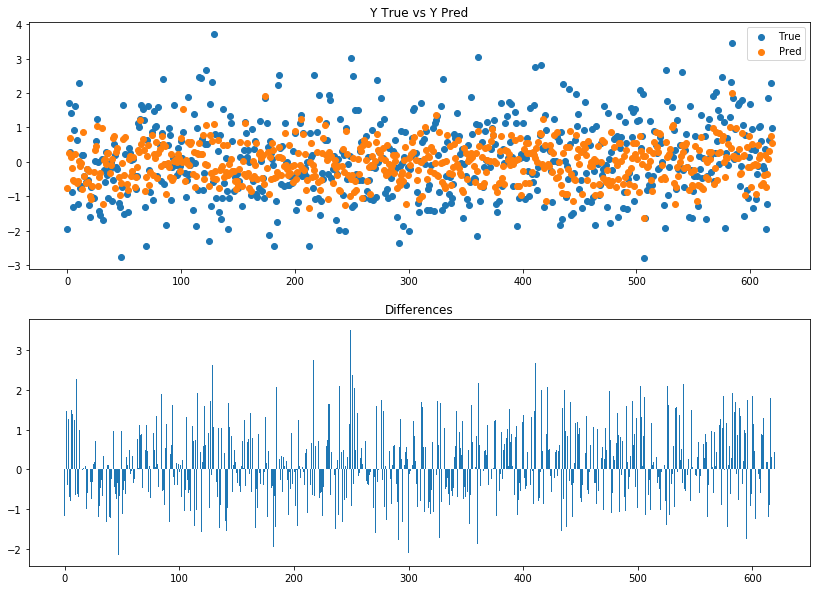

In [15]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

In [16]:
# Top 5 kbest selected features
cols = selectorK.get_support(indices=True)
features = heart_df.iloc[:,cols]
K_best_heart = list(features) 
K_best_heart

['heart_Volume_MYO_ED_shape',
 'heart_SurfaceAreatoVolumeRatio_MYO_ED_shape',
 'heart_Volume_MYO_ES_shape',
 'heart_SurfaceAreatoVolumeRatio_MYO_ES_shape',
 'heart_GrayLevelNonUniformity_gldm_MYO_ES_texture']

## 1.2 Predicting gVRF with CMR variables

In [17]:
# Input variables
X1 = cardio_cmr_df

In [18]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X1, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1445, 9), (620, 9), (1445,), (620,))

In [19]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Dimensionality reduction
selectorK = SelectKBest(f_regression, k=5)
X_tr = selectorK.fit_transform(X_train, y_train)

In [21]:
# Fitting the model and doing the predictions
LR.fit(X_tr, y_train)
y_pred = LR.predict(selectorK.transform(X_test))

In [22]:
print(LR.intercept_)
print(LR.coef_)

-0.6776369946764514
[-1.66761395  3.18583869  0.36217606 -0.07716344  0.29834809]


In [23]:
import statsmodels.api as sm
#   If you want to add constants
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  g_VRF   R-squared (uncentered):                   0.132
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                              24.21
Date:                Sun, 16 Aug 2020   Prob (F-statistic):                    6.53e-39
Time:                        15:54:14   Log-Likelihood:                         -2012.6
No. Observations:                1445   AIC:                                      4043.
Df Residuals:                    1436   BIC:                                      4091.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
dif = y_test-y_pred

In [25]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.8211103943168119
Mean Squared Error: 1.041896068156472
Root Mean Squared Error: 1.020733103292174
r2_score: 0.1486372453309911
MAPE: 2.2747538695948593


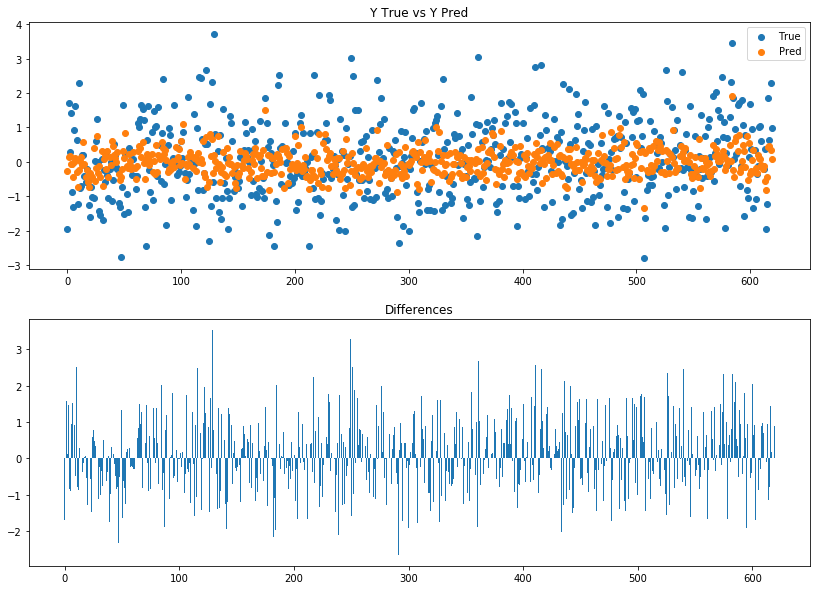

In [26]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

In [27]:
# Top 5 kbest selected features
cols = selectorK.get_support(indices=True)
features = cardio_cmr_df.iloc[:,cols]
K_best_cmr = list(features) 
K_best_cmr

['cardio_cmr_LVSV_i',
 'cardio_cmr_LVM_i',
 'cardio_cmr_LVEF',
 'cardio_cmr_RVESV_i',
 'cardio_cmr_RVEF']

## 1.3 Predicting gVRF with brain variables

In [28]:
# Input variables
X1 = brain_df

In [29]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X1, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1445, 744), (620, 744), (1445,), (620,))

In [30]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Dimensionality reduction
selectorK = SelectKBest(f_regression, k=5)
X_tr = selectorK.fit_transform(X_train, y_train)

In [32]:
# Fitting the model and doing the predictions
LR.fit(X_tr, y_train)
y_pred = LR.predict(selectorK.transform(X_test))

In [33]:
print(LR.intercept_)
print(LR.coef_)

-0.1802972420625581
[-1.22174985  0.16633162  1.4745337   1.49581788  0.79247148]


In [34]:
import statsmodels.api as sm
#   If you want to add constants
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  g_VRF   R-squared (uncentered):                   0.725
Model:                            OLS   Adj. R-squared (uncentered):              0.432
Method:                 Least Squares   F-statistic:                              2.480
Date:                Sun, 16 Aug 2020   Prob (F-statistic):                    3.55e-33
Time:                        15:54:40   Log-Likelihood:                         -1182.8
No. Observations:                1445   AIC:                                      3854.
Df Residuals:                     701   BIC:                                      7779.
Df Model:                         744                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
dif = y_test-y_pred

In [36]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.7294426177984726
Mean Squared Error: 0.878091876710328
Root Mean Squared Error: 0.9370655669217218
r2_score: 0.2824862845184345
MAPE: 1.9459927450486527


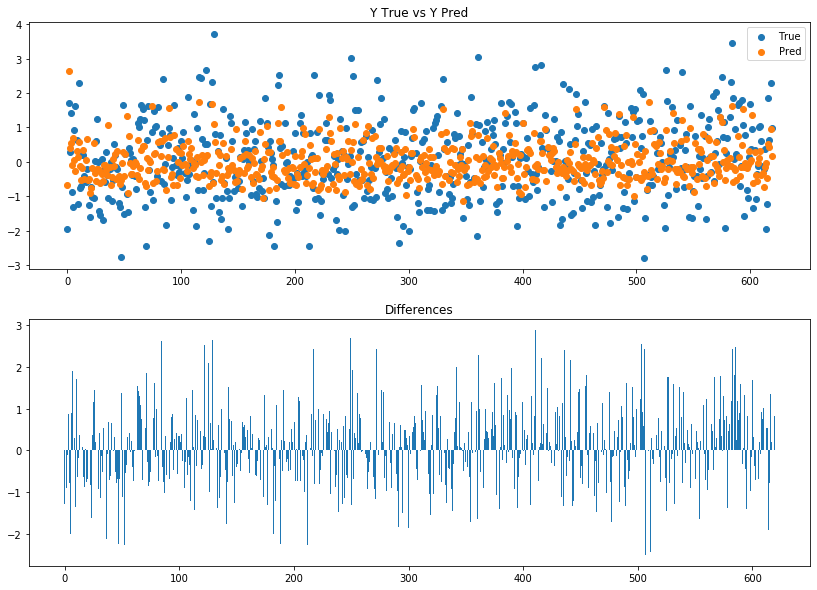

In [37]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

In [38]:
# Top 5 kbest selected features
cols = selectorK.get_support(indices=True)
features = brain_df.iloc[:,cols]
K_best_brain = list(features) 
K_best_brain

['brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging',
 'brain_bio_inverted_signal_to_noise_ratio_in_t1_0_imaging',
 'brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
 'brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
 'brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging']

## 1.4 Predicting gVRF with heart/brain combinations

In [39]:
# Input variables
X1 = heart_df
X2 = brain_df

In [40]:
# Combining datasets
X_combination_cfa = pd.concat((X1, X2), axis=1)
X_combination_cfa.shape

(2065, 1374)

In [41]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_combination_cfa, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1445, 1374), (620, 1374), (1445,), (620,))

In [42]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Dimensionality reduction
selectorK = SelectKBest(f_regression, k=5)
X_tr = selectorK.fit_transform(X_train, y_train)

In [44]:
# Fitting the model and doing the predictions
LR.fit(X_tr, y_train)
y_pred = LR.predict(selectorK.transform(X_test))

In [45]:
print(LR.intercept_)
print(LR.coef_)

0.9105539428948654
[-0.78031979 -1.86363756  1.81251392 -0.98486969 -0.00994144]


In [46]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  g_VRF   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     2.606
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           1.28e-08
Time:                        15:55:44   Log-Likelihood:                 506.63
No. Observations:                1445   AIC:                             1685.
Df Residuals:                      96   BIC:                             8802.
Df Model:                        1348                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.3443     22.821     -0.147      0.8

In [47]:
dif = y_test-y_pred

In [48]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.7656416628626509
Mean Squared Error: 0.8914468861458917
Root Mean Squared Error: 0.9441646499132933
r2_score: 0.2715735284680061
MAPE: 3.0125382844593194


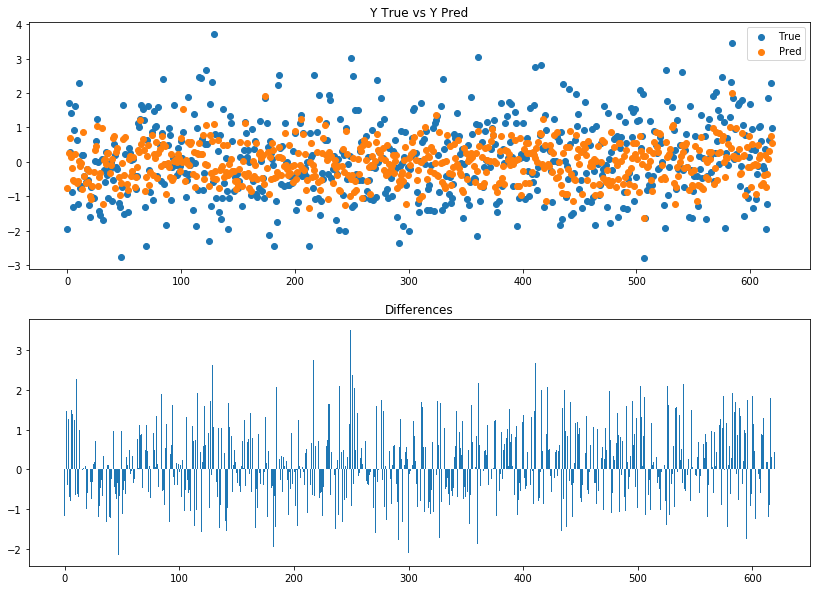

In [49]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

In [50]:
# Top 5 kbest selected features
cols = selectorK.get_support(indices=True)
features = X_combination_cfa.iloc[:,cols]
K_best_heart_brain = list(features) 
K_best_heart_brain

['heart_Volume_MYO_ED_shape',
 'heart_SurfaceAreatoVolumeRatio_MYO_ED_shape',
 'heart_Volume_MYO_ES_shape',
 'heart_SurfaceAreatoVolumeRatio_MYO_ES_shape',
 'heart_GrayLevelNonUniformity_gldm_MYO_ES_texture']

## 1.5 Predicting gVRF with CMR/brain combinations

In [51]:
# Input variables
X1 = cardio_cmr_df
X2 = brain_df

In [52]:
# Combining datasets
X_combination_cfa = pd.concat((X1, X2), axis=1)
X_combination_cfa.shape

(2065, 753)

In [53]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_combination_cfa, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1445, 753), (620, 753), (1445,), (620,))

In [54]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Dimensionality reduction
selectorK = SelectKBest(f_regression, k=5)
X_tr = selectorK.fit_transform(X_train, y_train)

In [56]:
# Fitting the model and doing the predictions
LR.fit(X_tr, y_train)
y_pred = LR.predict(selectorK.transform(X_test))

In [57]:
print(LR.intercept_)
print(LR.coef_)

-0.588636895358419
[ 1.41652262 -1.11649521  1.57627324  1.43085939  0.53214684]


In [58]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  g_VRF   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.446
Method:                 Least Squares   F-statistic:                              2.547
Date:                Sun, 16 Aug 2020   Prob (F-statistic):                    7.79e-35
Time:                        15:56:23   Log-Likelihood:                         -1155.5
No. Observations:                1445   AIC:                                      3817.
Df Residuals:                     692   BIC:                                      7790.
Df Model:                         753                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
dif = y_test-y_pred

In [60]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.716735052197509
Mean Squared Error: 0.822287388199271
Root Mean Squared Error: 0.9068006331048027
r2_score: 0.3280857109043429
MAPE: 1.9703141222503493


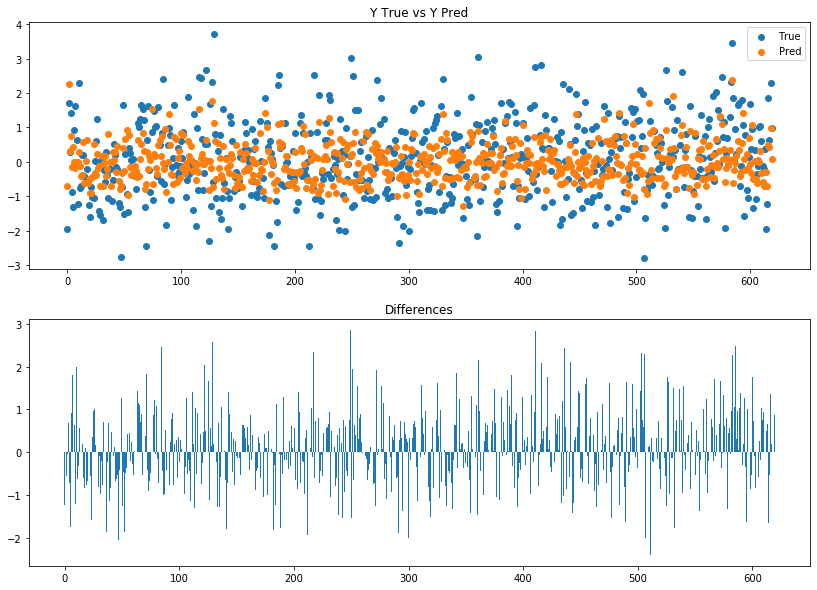

In [61]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

In [62]:
# Top 5 kbest selected features
cols = selectorK.get_support(indices=True)
features = X_combination_cfa.iloc[:,cols]
K_best_cmr_brain = list(features) 
K_best_cmr_brain

['cardio_cmr_LVM_i',
 'brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging',
 'brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
 'brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
 'brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging']

## 1.6 Correlation Plots

In [63]:
K_best_heart, K_best_cmr, K_best_brain, K_best_heart_brain, K_best_cmr_brain

(['heart_Volume_MYO_ED_shape',
  'heart_SurfaceAreatoVolumeRatio_MYO_ED_shape',
  'heart_Volume_MYO_ES_shape',
  'heart_SurfaceAreatoVolumeRatio_MYO_ES_shape',
  'heart_GrayLevelNonUniformity_gldm_MYO_ES_texture'],
 ['cardio_cmr_LVSV_i',
  'cardio_cmr_LVM_i',
  'cardio_cmr_LVEF',
  'cardio_cmr_RVESV_i',
  'cardio_cmr_RVEF'],
 ['brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging',
  'brain_bio_inverted_signal_to_noise_ratio_in_t1_0_imaging',
  'brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
  'brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
  'brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging'],
 ['heart_Volume_MYO_ED_shape',
  'heart_SurfaceAreatoVolumeRatio_MYO_ED_shape',
  'heart_Volume_MYO_ES_shape',
  'heart_SurfaceAreatoVolumeRatio_MYO_ES_shape',
  'heart_GrayLevelNonUniformity_gldm_MYO_ES_texture'],
 ['cardio_cmr_LVM_i',
  'brain_bio_volume_of_grey_matter__n

In [64]:
# Create dataframe
corr_heart_brain = data.filter(['heart_Volume_MYO_ED_shape', 
                         'heart_SurfaceAreatoVolumeRatio_MYO_ED_shape',
                         'heart_Volume_MYO_ES_shape',
                         'heart_SurfaceAreatoVolumeRatio_MYO_ES_shape',
                         'heart_GrayLevelNonUniformity_gldm_MYO_ES_texture',
                         'brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging',
                         'brain_bio_inverted_signal_to_noise_ratio_in_t1_0_imaging',
                         'brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
                         'brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
                         'brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging'], axis=1)

corr_cmr_brain = data.filter(['cardio_cmr_LVSV_i', 
                         'cardio_cmr_LVM_i',
                         'cardio_cmr_LVEF',
                         'cardio_cmr_RVESV_i',
                         'cardio_cmr_RVEF',
                         'brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging',
                         'brain_bio_inverted_signal_to_noise_ratio_in_t1_0_imaging',
                         'brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
                         'brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging',
                         'brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging'], axis=1)

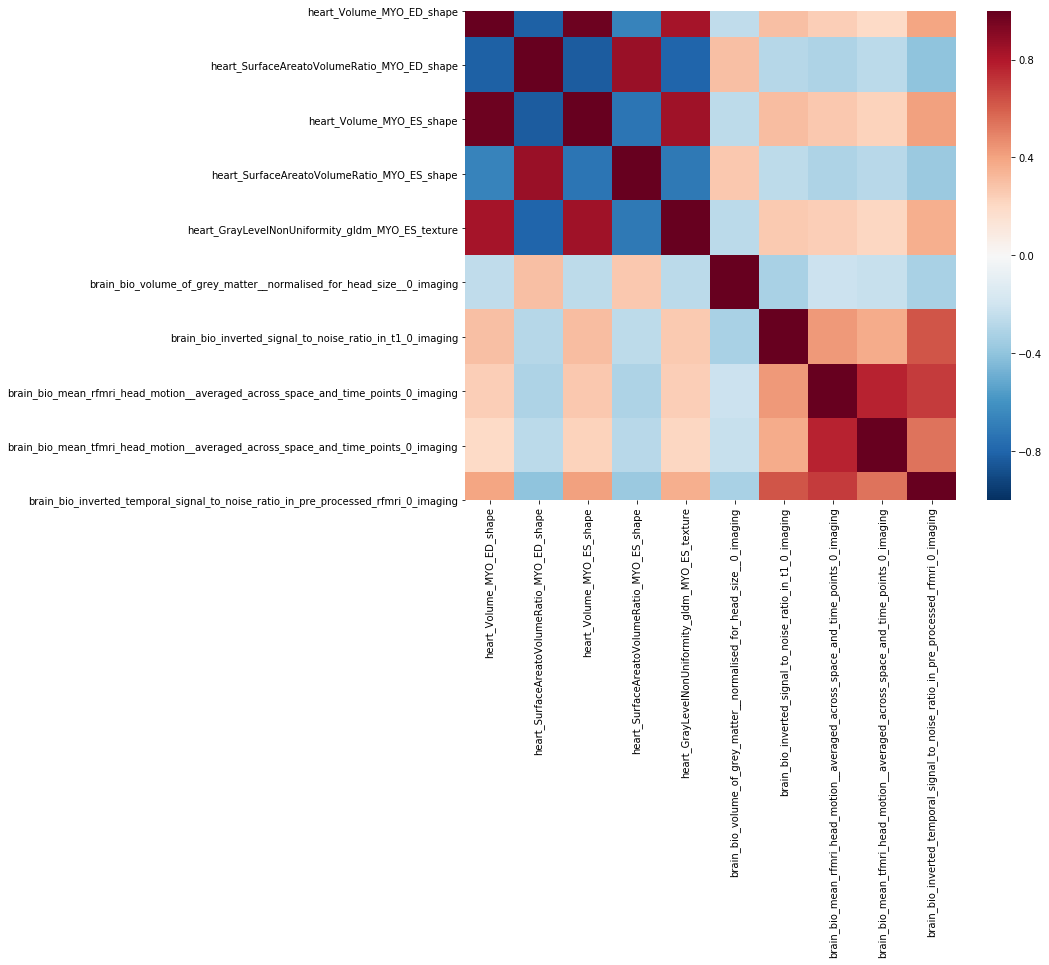

In [65]:
heart_brain_corr = corr_heart_brain.corr()
plt.figure(figsize=(11,9))
sns.heatmap(heart_brain_corr, cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)
plt.show()

In [66]:
heart_brain_corr

,heart_Volume_MYO_ED_shape,heart_SurfaceAreatoVolumeRatio_MYO_ED_shape,heart_Volume_MYO_ES_shape,heart_SurfaceAreatoVolumeRatio_MYO_ES_shape,heart_GrayLevelNonUniformity_gldm_MYO_ES_texture,brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging,brain_bio_inverted_signal_to_noise_ratio_in_t1_0_imaging,brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging,brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging,brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging
heart_Volume_MYO_ED_shape,1.000000,-0.813997,0.979697,-0.669416,0.828849,-0.253661,0.300485,0.249744,0.201839,0.396991
heart_SurfaceAreatoVolumeRatio_MYO_ED_shape,-0.813997,1.000000,-0.828787,0.863370,-0.797940,0.298068,-0.282066,-0.305453,-0.267613,-0.405059
heart_Volume_MYO_ES_shape,0.979697,-0.828787,1.000000,-0.726956,0.851019,-0.258418,0.312351,0.270353,0.228804,0.412880
heart_SurfaceAreatoVolumeRatio_MYO_ES_shape,-0.669416,0.863370,-0.726956,1.000000,-0.711663,0.271249,-0.263978,-0.305184,-0.278184,-0.367506
heart_GrayLevelNonUniformity_gldm_MYO_ES_texture,0.828849,-0.797940,0.851019,-0.711663,1.000000,-0.269077,0.261422,0.242925,0.211915,0.366105
brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging,-0.253661,0.298068,-0.258418,0.271249,-0.269077,1.000000,-0.325592,-0.214465,-0.229062,-0.328047
brain_bio_inverted_signal_to_noise_ratio_in_t1_0_imaging,0.300485,-0.282066,0.312351,-0.263978,0.261422,-0.325592,1.000000,0.432335,0.370281,0.627819
brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging,0.249744,-0.305453,0.270353,-0.305184,0.242925,-0.214465,0.432335,1.000000,0.770301,0.695842
brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging,0.201839,-0.267613,0.228804,-0.278184,0.211915,-0.229062,0.370281,0.770301,1.000000,0.541515
brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging,0.396991,-0.405059,0.412880,-0.367506,0.366105,-0.328047,0.627819,0.695842,0.541515,1.000000


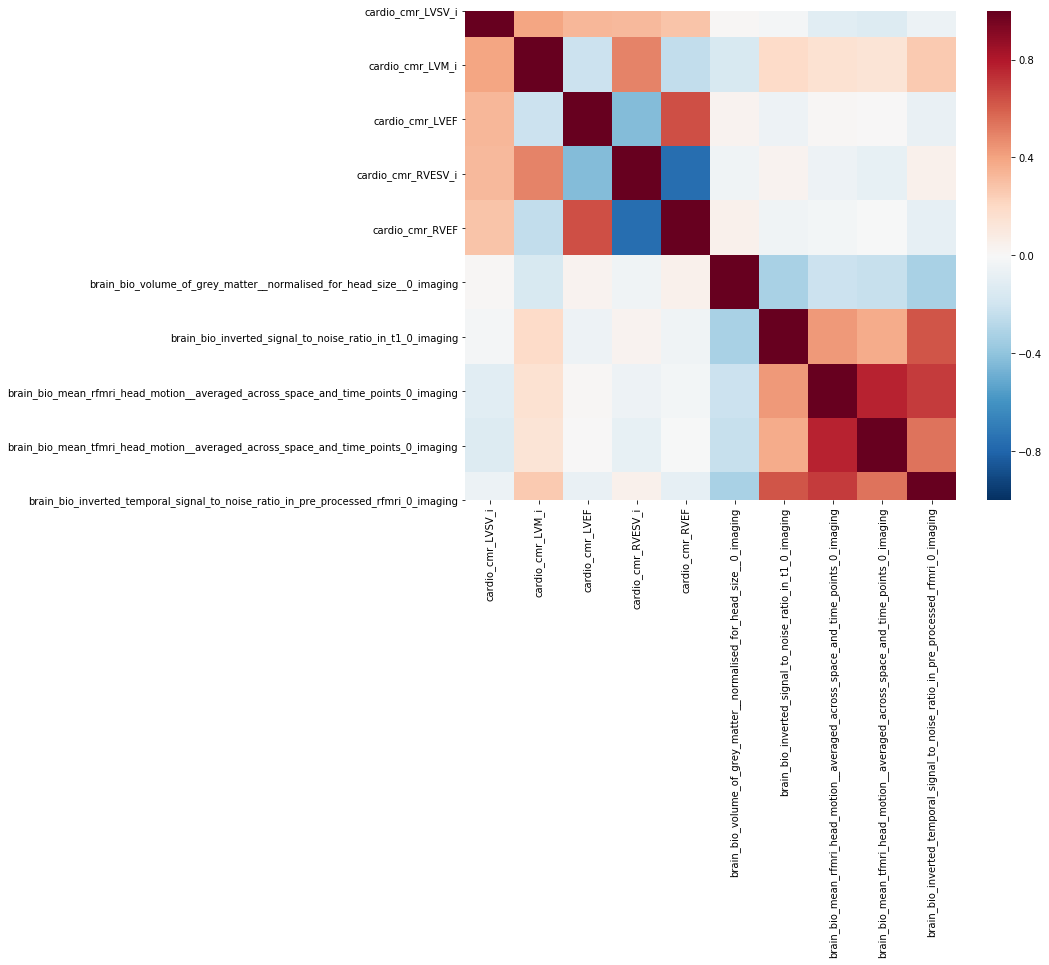

In [67]:
cmr_brain_corr = corr_cmr_brain.corr()
plt.figure(figsize=(11,9))
sns.heatmap(cmr_brain_corr, cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)
plt.show()

In [68]:
cmr_brain_corr

,cardio_cmr_LVSV_i,cardio_cmr_LVM_i,cardio_cmr_LVEF,cardio_cmr_RVESV_i,cardio_cmr_RVEF,brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging,brain_bio_inverted_signal_to_noise_ratio_in_t1_0_imaging,brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging,brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging,brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging
cardio_cmr_LVSV_i,1.000000,0.397512,0.333602,0.322578,0.284224,0.010964,-0.016989,-0.114372,-0.134150,-0.055876
cardio_cmr_LVM_i,0.397512,1.000000,-0.214380,0.492306,-0.242978,-0.159777,0.192510,0.153583,0.135383,0.262082
cardio_cmr_LVEF,0.333602,-0.214380,1.000000,-0.436909,0.646514,0.039049,-0.049485,0.010295,0.006896,-0.073984
cardio_cmr_RVESV_i,0.322578,0.492306,-0.436909,1.000000,-0.764183,-0.041199,0.035112,-0.051312,-0.079612,0.051324
cardio_cmr_RVEF,0.284224,-0.242978,0.646514,-0.764183,1.000000,0.050739,-0.044533,-0.028985,-0.007747,-0.092877
brain_bio_volume_of_grey_matter__normalised_for_head_size__0_imaging,0.010964,-0.159777,0.039049,-0.041199,0.050739,1.000000,-0.325592,-0.214465,-0.229062,-0.328047
brain_bio_inverted_signal_to_noise_ratio_in_t1_0_imaging,-0.016989,0.192510,-0.049485,0.035112,-0.044533,-0.325592,1.000000,0.432335,0.370281,0.627819
brain_bio_mean_rfmri_head_motion__averaged_across_space_and_time_points_0_imaging,-0.114372,0.153583,0.010295,-0.051312,-0.028985,-0.214465,0.432335,1.000000,0.770301,0.695842
brain_bio_mean_tfmri_head_motion__averaged_across_space_and_time_points_0_imaging,-0.134150,0.135383,0.006896,-0.079612,-0.007747,-0.229062,0.370281,0.770301,1.000000,0.541515
brain_bio_inverted_temporal_signal_to_noise_ratio_in_pre_processed_rfmri_0_imaging,-0.055876,0.262082,-0.073984,0.051324,-0.092877,-0.328047,0.627819,0.695842,0.541515,1.000000


# 2. References

[1] [Pedregosa, F. et al. (2011)](https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf). Scikit-learn: Machine Learning in Python.